In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
folder = os.path.join('..', 'outputs', 'saved_run_20231123t120523')  # G2V, inverse
# # folder = os.path.join('..', 'outputs', 'saved_run_20231127t142955')  # G2V, chi square, 1 +/- 2 days
# # folder = os.path.join('..', 'outputs', 'saved_run_20231129t135757')  # F8V, chi square, 5 +/- 2 days
# folder = os.path.join('..', 'outputs', 'saved_run_20231130t172730')  # K1V, chi square, 1 +/- 2 days

In [3]:
reader = emcee.backends.HDFBackend(os.path.join(folder, 'backend.hdf'))

In [4]:
chain = reader.get_chain()
nstep, nwalker, ndim = chain.shape

In [5]:
print(f"(nstep, nwalker, ndim):  {chain.shape}")

(nstep, nwalker, ndim):  (31794, 152, 19)


In [6]:
acc_rate = reader.accepted/chain.shape[0]

In [7]:
print(acc_rate.mean())

0.0890624430958506


In [8]:
tau = reader.get_autocorr_time(tol=1)

In [9]:
print(tau.mean())
print(np.median(tau))

2118.9597889260763
2088.858384169687


In [10]:
print(tau)

[2288.19632078 2010.5185071  1989.79387481 2053.10447094 2184.14381422
 2050.07694456 1912.4179772  2037.26883873 2088.85838417 2541.98143969
 2092.32436438 2067.84998997 1988.94191523 1991.93716171 2324.1964679
 2175.47979324 2142.75219908 2108.23957866 2212.15394722]


In [11]:
ndx_max = np.argmax(tau)
print(f"index of max tau:  {ndx_max}")
print(f"max. tau value:  {tau[ndx_max]}")

index of max tau:  9
max. tau value:  2541.9814396911847


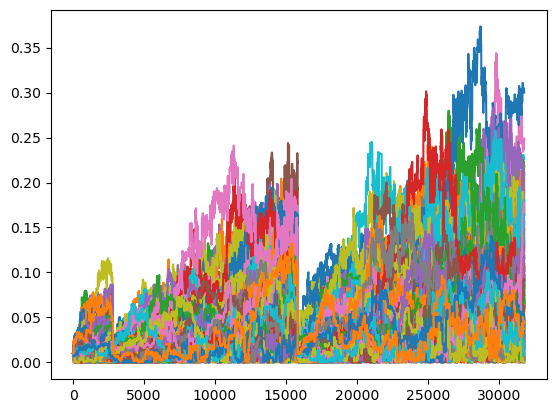

In [12]:
plt.plot(chain[:, :, ndx_max])
plt.show()

In [13]:
plt.plot(chain[:, :, 20])
plt.show()

IndexError: index 20 is out of bounds for axis 2 with size 19

In [ ]:
discard = int(6*tau.max())
thin_factor = 4
# flat_chain = reader.get_chain(discard=discard, flat=True
#                               , thin=int(tau.min()/thin_factor))
flat_chain = reader.get_chain(flat=True
                              , thin=int(tau.min()/thin_factor))
flat_chain = 
print(flat_chain.shape)

In [ ]:
# labels = ["idark", "S-L", "S-M", "LF1-L", "LF1-M", "LF2-L", "LF2-M", "LF3-L", "LF3-M", "MF-L", "MF-M", "HF-L", "HF-M"
#           , "C3", "C4", "C5", "T3", "T4", "T5"]

labels = ["idark", "S-L", "S-M", "LF1-L", "LF1-M", "LF2-L", "LF2-M", "LF3-L", "LF3-M", "MF-L", "MF-M", "HF-L", "HF-M"
          , "C1", "C2", "C3", "C4", "C5", "T1", "T2", "T3", "T4", "T5"]
# labels = ["T3", "T4", "T5"]

In [ ]:
for i in range(flat_chain.shape[1]):
    print(i)
    fig = corner.corner(flat_chain[:, i:i+1], labels=labels[i]
                        , quantiles=[0.16, 0.5, 0.84], show_titles=True
                        ,title_fmt='0.1E')
    plt.show()

In [ ]:
fig = corner.corner(flat_chain
                    , labels=labels
                    , quantiles=[0.16, 0.5, 0.84]
                    , show_titles=True
                    , title_kwargs={"fontsize": 12}
                    , title_fmt=".1E")

plt.savefig(os.path.join(folder, 'corner_quartiles.png'))
plt.show()

In [ ]:
blobs = reader.get_blobs(discard=discard, flat=True
                         , thin=int(tau.min()/thin_factor))

In [ ]:
print(blobs['int_time'].shape)

In [ ]:
int_time_flat = blobs['int_time'][:, 0, :]
print(int_time_flat.shape)

In [ ]:
var_ndx = 13
sift_ndx = np.where(flat_chain[:, var_ndx]==flat_chain[:, var_ndx].max())
print(len(sift_ndx[0]))
print(sift_ndx)

In [ ]:
for m in range(len(sift_ndx[0])):
    for i in range(ndim): 
        print(f"{i}\t{flat_chain[sift_ndx[0][m]][i]:.1E}") 
    print(f"int_time: {int_time_flat[sift_ndx[0][m]]}")

In [ ]:
var_ndx = 10
sift_ndx = np.where(flat_chain[:, var_ndx]==flat_chain[:, var_ndx].max())
print(sift_ndx)

In [ ]:
for m in range(len(sift_ndx[0])):
    for i in range(ndim): 
        print(f"{i}\t{flat_chain[sift_ndx[0][m]][i]:.1E}") 
    print(f"int_time: {int_time_flat[sift_ndx[0][m]]}")

In [ ]:
quantiles = []
for dim in range(ndim):
    quantiles.append(corner.quantile(flat_chain[:, dim], [0.16, 0.5, 0.84]))
    print(f"{dim}\t{corner.quantile(flat_chain[:, dim], [0.16, 0.5, 0.84])}")

In [ ]:
np.savetxt(os.path.join(folder, 'quantiles.csv'), np.array(quantiles), delimiter=',')

In [ ]:
sel_vars = [10, 14, 20, 21, 22]
var_cutoff = [0.03, 3e-10, 0.15, 0.3, 0.4]
cutoff_type = ['lower', 'lower', 'upper', 'upper', 'upper']
int_time_cutoff = 5.0
ndx = np.ones_like(flat_chain[:, 0])
for j, var in enumerate(sel_vars):
    if cutoff_type[j] == 'lower':
        ndx *= np.where(flat_chain[:, var]>var_cutoff[j], 1, 0)
    elif cutoff_type[j]  == 'upper':
        ndx *= np.where(flat_chain[:, var]<var_cutoff[j], 1, 0)
mean_int_time = np.mean(blobs['int_time'][:, 0, :], axis=1)
ndx *= np.where(mean_int_time<int_time_cutoff, 1, 0)
ndx = np.where(ndx>0)
sel_chain = flat_chain[ndx]
sel_blobs = blobs[ndx]
print(sel_chain.shape)
print(sel_blobs.shape)

In [ ]:
print(sel_chain)

In [ ]:
np.savetxt(os.path.join(folder, 'sel_chain.csv'), sel_chain
           , delimiter=',')

In [ ]:
import ebs.log_pdf as lp

In [ ]:
x = np.linspace(0, 10.0, 64)
y = [np.exp(lp.chi_square(val, 1.0, 2.0)) for val in x]
plt.plot(x, y)
plt.grid(True, 'both')
plt.show()